In [1]:
import numpy as np
import pandas as pd
import os

"""
This will load a csv file and return a pandas dataframe
@input: filepath:: string :: filepath of csv file
@input: names:: list :: column names list 
"""
def load_csv(filepath, names=None):
    filepath =  os.path.abspath(filepath)
    if os.path.exists(filepath):
        df = pd.read_csv(filepath, names=names, encoding='utf-8')
        return df
    
    return None

filepath = "data/credit.csv"
df = load_csv(filepath)
df.head()

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


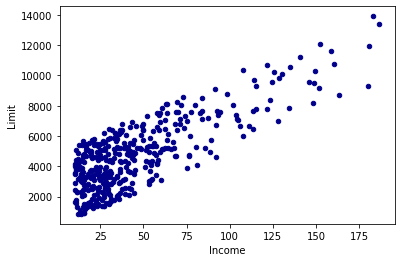

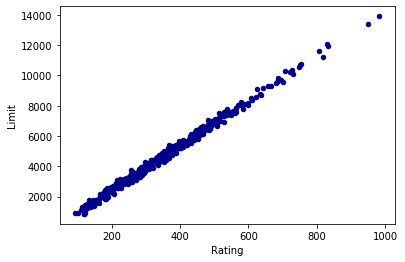

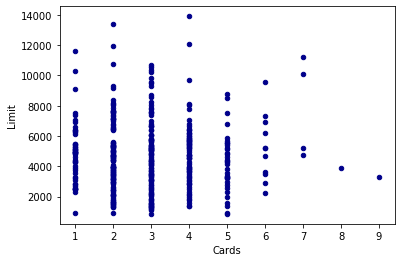

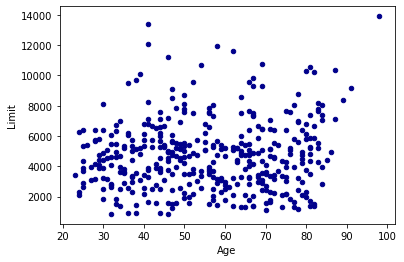

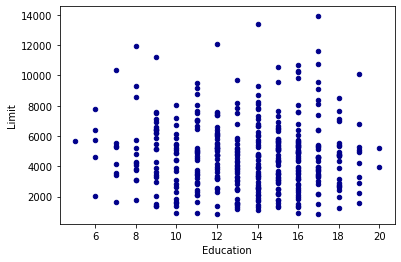

In [11]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
import statsmodels

dimension_list = ["Income", "Rating", "Cards", "Age", "Education"]
target = "Limit"
# Scatter plot for dimension against target
for dimension in dimension_list:
    df.plot(kind="scatter", x=dimension, y=target, c='DarkBlue')

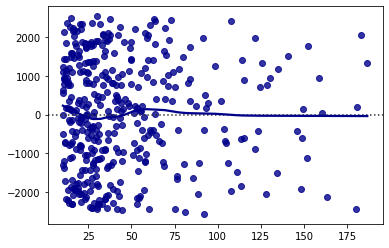

In [12]:
# Residual Plot of dimension against target
sns.residplot(df["Income"].to_numpy(), df[target].to_numpy(), lowess=True, color="DarkBlue")

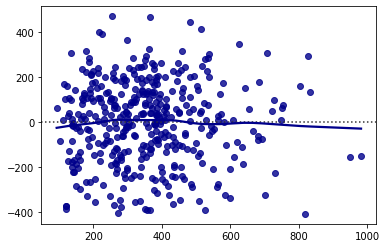

In [13]:
sns.residplot(df["Rating"].to_numpy(), df[target].to_numpy(), lowess=True, color="DarkBlue")

/Users/vikasramaneti/workspace/CS663/machine_learning_pkgs/lib/python3.7/site-packages/statsmodels/nonparametric/smoothers_lowess.py:165: RuntimeWarning: invalid value encountered in greater_equal
  res = _lowess(y, x, frac=frac, it=it, delta=delta)


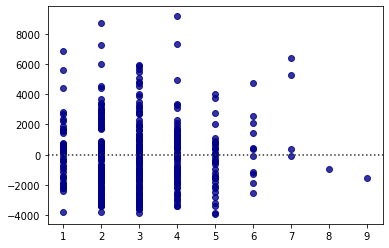

In [14]:
sns.residplot(df["Cards"].to_numpy(), df[target].to_numpy(), lowess=True, color="DarkBlue")

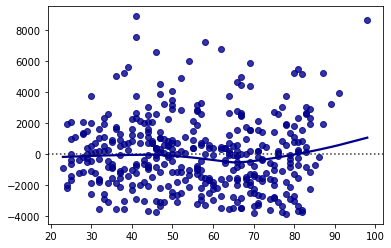

In [15]:
sns.residplot(df["Age"].to_numpy(), df[target].to_numpy(), lowess=True, color="DarkBlue")

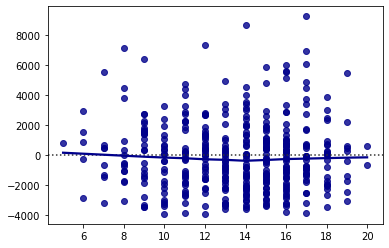

In [16]:
sns.residplot(df["Education"].to_numpy(), df[target].to_numpy(), lowess=True, color="DarkBlue")

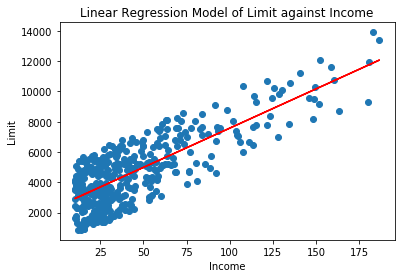

Residual Square Score 0.6274039404819071
Slope of linear regression: [[51.8750206]]
Slope of linear regression: [2389.86940892]


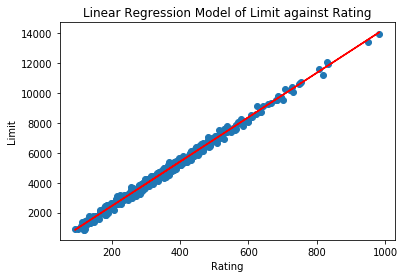

Residual Square Score 0.9937692100445441
Slope of linear regression: [[14.87160712]]
Slope of linear regression: [-542.92822999]


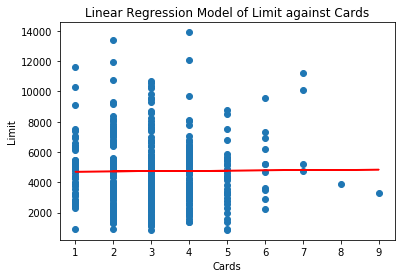

Residual Square Score 0.00010468017486597869
Slope of linear regression: [[17.22189457]]
Slope of linear regression: [4684.66624682]


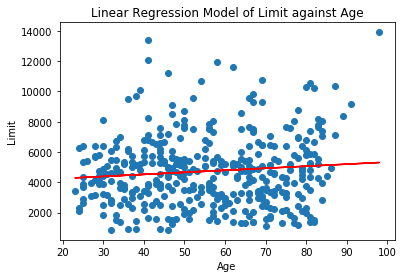

Residual Square Score 0.010178372717245643
Slope of linear regression: [[13.49982568]]
Slope of linear regression: [3984.09845403]


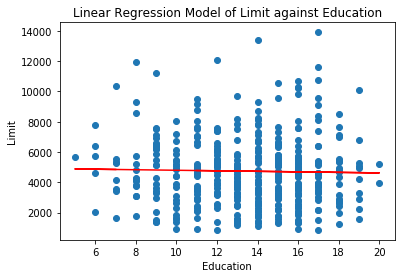

Residual Square Score 0.0005545334620582487
Slope of linear regression: [[-17.39235309]]
Slope of linear regression: [4969.52714909]


In [23]:
# Linear Regression for dimension against target
for dimension in dimension_list:
    lin_reg = LinearRegression()
    # Convert to numpy array
    X = df[dimension].values.reshape(-1, 1)
    Y = df[target].values.reshape(-1, 1)

    # Fit against the linear regression model
    lin_reg.fit(X, Y)

    Y_pred = lin_reg.predict(X)
    plt.scatter(X, Y)
    plt.title("Linear Regression Model of " + target + " against " + dimension)
    plt.xlabel(dimension)
    plt.ylabel(target)
    plt.plot(X, Y_pred, color='red')
    plt.show()

    print("Residual Square Score", lin_reg.score(X,Y)) # Gives the Residual square score score for the linear model    
    print("Slope of linear regression: " + str(lin_reg.coef_)) # For retrieving the slope:
    print("Slope of linear regression: " + str(lin_reg.intercept_)) # #For retrieving the intercept:

0.8215334744346307

array([[3.57020202]])

In [46]:
#For retrieving the intercept:
lin_reg.intercept_

array([62.36585859])